In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import train_test_val_split

In [81]:
inlets = pd.read_csv("../datasets/all_inlets.csv", index_col="Time")
inlets = inlets.add_prefix("inlet_")

# outlets
outlets = pd.read_csv("../datasets/all_outlets.csv", index_col="Time")
outlets = outlets.add_prefix("outlet_")

In [40]:
inlets

,inlet_Case_id,inlet_fan_speed,inlet_1,inlet_2,inlet_3,inlet_4,inlet_5,inlet_6,inlet_7,inlet_8,...,inlet_126,inlet_127,inlet_128,inlet_129,inlet_130,inlet_131,inlet_132,inlet_133,inlet_134,inlet_135
Time,,,,,,,,,,,,,,,,,,,,,
0,5,50.0,25.92,25.003333,24.086667,23.17,20.38,18.145,15.91,15.155,...,21.36,26.54,26.576667,26.613333,26.65,26.03,24.605,23.18,26.090,29.00
5,5,50.0,26.08,25.150000,24.220000,23.29,20.23,18.650,17.07,15.745,...,21.56,26.07,26.900000,27.730000,28.56,27.20,25.775,24.35,26.745,29.14
10,5,50.0,25.85,25.053333,24.256667,23.46,19.84,18.070,16.30,15.370,...,20.99,26.33,26.636667,26.943333,27.25,26.01,24.855,23.70,26.355,29.01
15,5,50.0,25.78,24.846667,23.913333,22.98,18.99,17.465,15.94,15.220,...,21.04,25.99,26.213333,26.436667,26.66,26.17,24.775,23.38,26.165,28.95
20,5,50.0,25.80,24.776667,23.753333,22.73,20.04,18.170,16.30,15.500,...,21.29,26.74,26.960000,27.180000,27.40,25.97,24.775,23.58,26.290,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,3,50.0,27.68,26.603333,25.526667,24.45,20.28,18.320,16.36,15.440,...,18.43,25.17,24.280000,23.390000,22.50,21.79,20.885,19.98,25.015,30.05
1035,3,50.0,27.81,26.956667,26.103333,25.25,20.34,18.420,16.50,15.760,...,18.67,25.00,25.103333,25.206667,25.31,24.37,22.495,20.62,25.335,30.05
1040,3,50.0,27.05,25.763333,24.476667,23.19,19.93,17.870,15.81,15.185,...,18.63,25.24,25.306667,25.373333,25.44,24.11,22.805,21.50,25.780,30.06


In [82]:
df = pd.concat([inlets, outlets], axis=1)

In [42]:
df

,inlet_Case_id,inlet_fan_speed,inlet_1,inlet_2,inlet_3,inlet_4,inlet_5,inlet_6,inlet_7,inlet_8,...,outlet_126,outlet_127,outlet_128,outlet_129,outlet_130,outlet_131,outlet_132,outlet_133,outlet_134,outlet_135
Time,,,,,,,,,,,,,,,,,,,,,
0,5,50.0,25.92,25.003333,24.086667,23.17,20.38,18.145,15.91,15.155,...,21.36,26.54,26.576667,26.613333,26.65,26.03,24.605,23.18,26.090,29.00
5,5,50.0,26.08,25.150000,24.220000,23.29,20.23,18.650,17.07,15.745,...,21.56,26.07,26.900000,27.730000,28.56,27.20,25.775,24.35,26.745,29.14
10,5,50.0,25.85,25.053333,24.256667,23.46,19.84,18.070,16.30,15.370,...,20.99,26.33,26.636667,26.943333,27.25,26.01,24.855,23.70,26.355,29.01
15,5,50.0,25.78,24.846667,23.913333,22.98,18.99,17.465,15.94,15.220,...,21.04,25.99,26.213333,26.436667,26.66,26.17,24.775,23.38,26.165,28.95
20,5,50.0,25.80,24.776667,23.753333,22.73,20.04,18.170,16.30,15.500,...,21.29,26.74,26.960000,27.180000,27.40,25.97,24.775,23.58,26.290,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,3,50.0,27.68,26.603333,25.526667,24.45,20.28,18.320,16.36,15.440,...,18.43,25.17,24.280000,23.390000,22.50,21.79,20.885,19.98,25.015,30.05
1035,3,50.0,27.81,26.956667,26.103333,25.25,20.34,18.420,16.50,15.760,...,18.67,25.00,25.103333,25.206667,25.31,24.37,22.495,20.62,25.335,30.05
1040,3,50.0,27.05,25.763333,24.476667,23.19,19.93,17.870,15.81,15.185,...,18.63,25.24,25.306667,25.373333,25.44,24.11,22.805,21.50,25.780,30.06


In [83]:
df.to_csv("../datasets/df.csv", index=False)

In [84]:
len(df)

1752

In [85]:
df['inlet_Case_id'].value_counts()

5    783
4    371
3    211
2    204
1    183
Name: inlet_Case_id, dtype: int64

In [86]:
df['inlet_Case_id'].value_counts() / len(df)

5    0.446918
4    0.211758
3    0.120434
2    0.116438
1    0.104452
Name: inlet_Case_id, dtype: float64

In [87]:
case_1 = df[df['inlet_Case_id'] == 1]
case_2 = df[df['inlet_Case_id'] == 2]
case_3 = df[df['inlet_Case_id'] == 3]
case_4 = df[df['inlet_Case_id'] == 4]
case_5 = df[df['inlet_Case_id'] == 5]

In [88]:
# Drop Case id columns
case_1 = case_1.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_2 = case_2.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_3 = case_3.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_4 = case_4.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_5 = case_5.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)

In [89]:
# Export to csv format
case_1.to_csv('../datasets/case_1.csv')
case_2.to_csv('../datasets/case_2.csv')
case_3.to_csv('../datasets/case_3.csv')
case_4.to_csv('../datasets/case_4.csv')
case_5.to_csv('../datasets/case_5.csv')

In [90]:
inlet_cols = list(inlets.columns)
outlet_cols = list(outlets.columns)
del inlet_cols[:2] # delete 'inlet_Case_id' and 'inlet_fan_speed'
del outlet_cols[:2] # delete 'outlet_Case_id' and 'outlet_fan_speed'

# Visualization

## Case 1

In [91]:
train_c1, test_c1, val_c1 = train_test_val_split(case_1, test_size=1)

### Fan Speed

#### Inlets

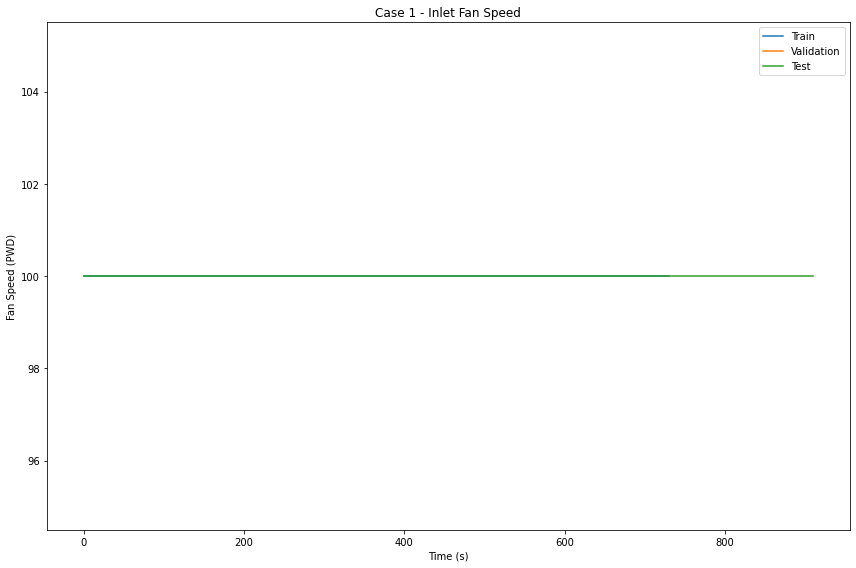

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['inlet_fan_speed'].plot(label="Train")
val_c1['inlet_fan_speed'].plot(label="Validation")
test_c1['inlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()
plt.tight_layout()

plt.savefig("../plots/preprocessing/case1_inlet_fan_speed.jpg", dpi=300)

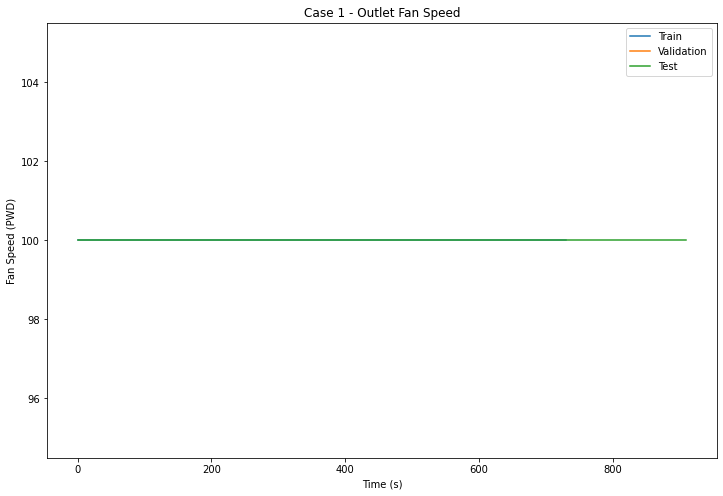

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['outlet_fan_speed'].plot(label="Train")
val_c1['outlet_fan_speed'].plot(label="Validation")
test_c1['outlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

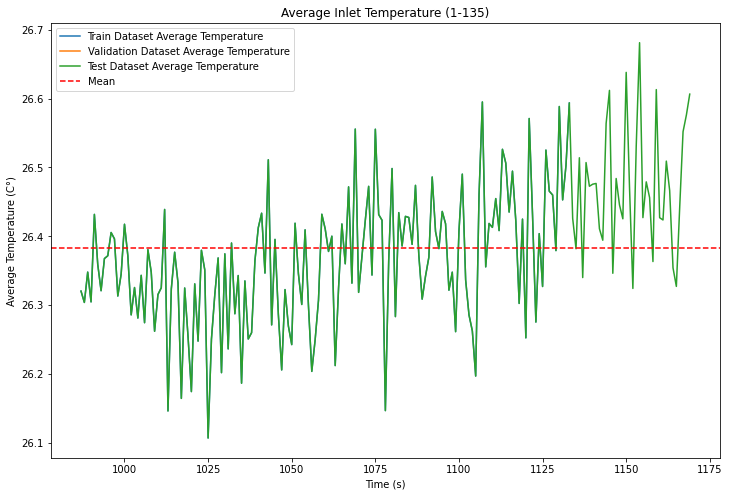

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[inlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c1[inlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c1[inlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

mean = case_1[inlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# plt.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

plt.legend()

plt.savefig("../plots/preprocessing/case1_inlet_temp.jpg", dpi=300)

#### Outlets

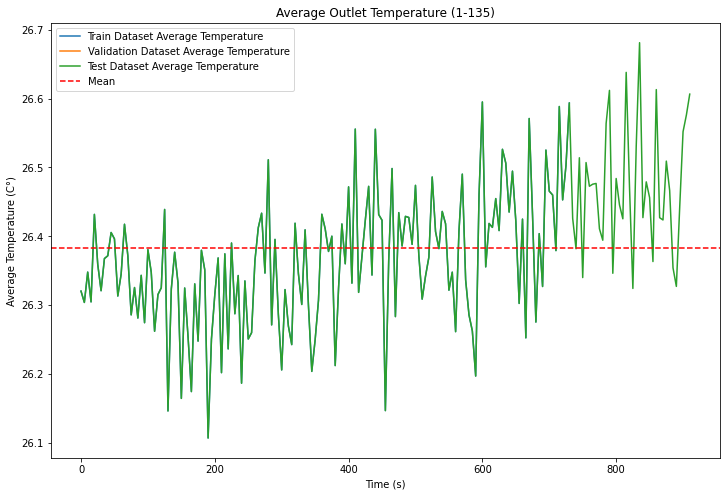

In [93]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[outlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c1[outlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c1[outlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

mean = case_1[outlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_temp.jpg", dpi=300)

## Case 2

In [17]:
train_c2, test_c2, val_c2 = train_test_val_split(case_2, test_size=0)

### Fan Speed

#### Inlets

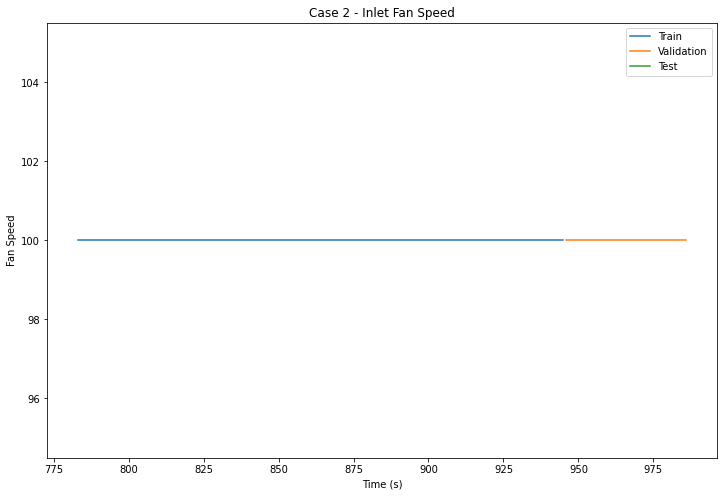

In [56]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["inlet_fan_speed"].plot(label="Train")
val_c2["inlet_fan_speed"].plot(label="Validation")
test_c2["inlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_fan_speed.jpg", dpi=300)

#### Outlets

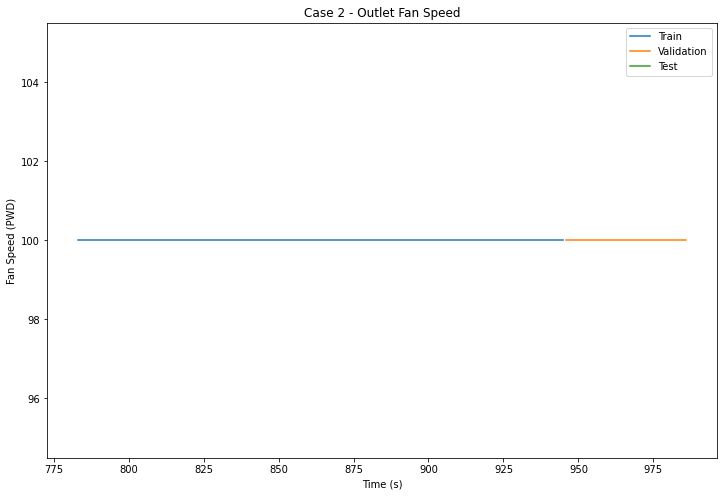

In [92]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["outlet_fan_speed"].plot(label="Train")
val_c2["outlet_fan_speed"].plot(label="Validation")
test_c2["outlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

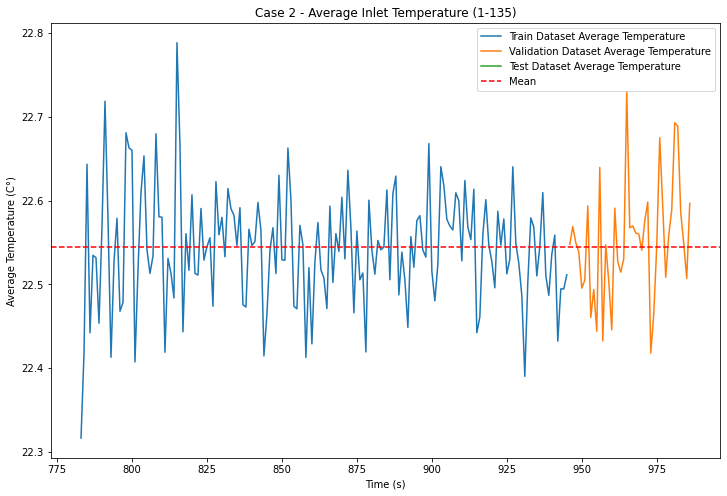

In [58]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[inlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c2[inlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c2[inlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

mean = case_2[inlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_temp.jpg", dpi=300)

#### Outlets

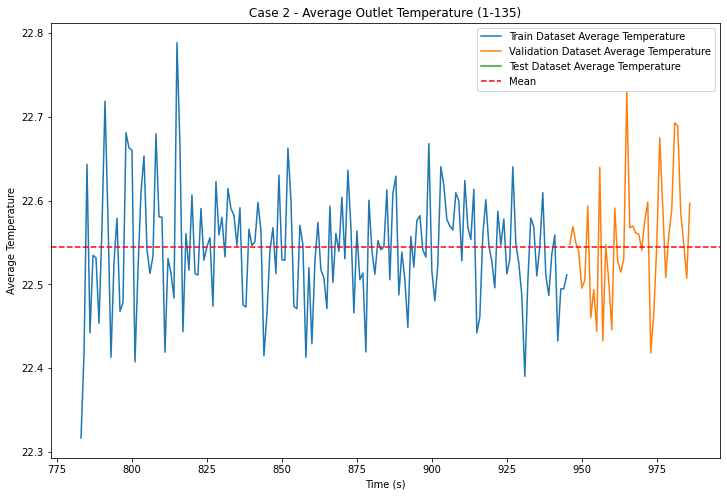

In [59]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[outlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c2[outlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c2[outlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

mean = case_2[outlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 

plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_temp.jpg", dpi=300)

## Case 3

In [60]:
train_c3, test_c3, val_c3 = train_test_val_split(case_3, test_size=0)

### Inlet Fan Speed

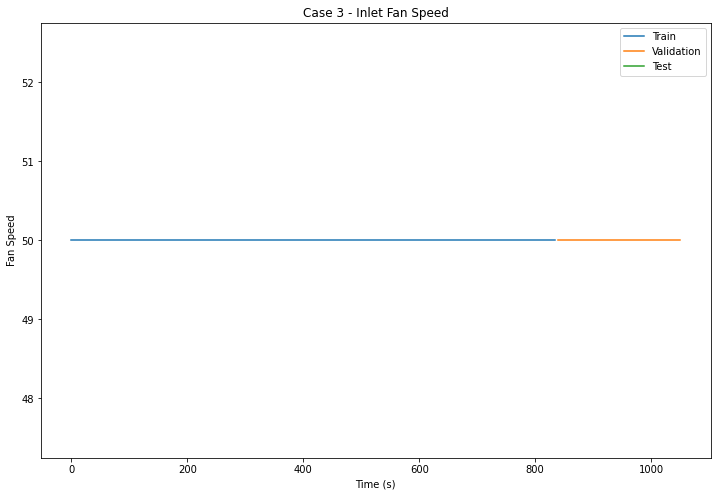

In [61]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["inlet_fan_speed"].plot(label="Train")
val_c3["inlet_fan_speed"].plot(label="Validation")
test_c3["inlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

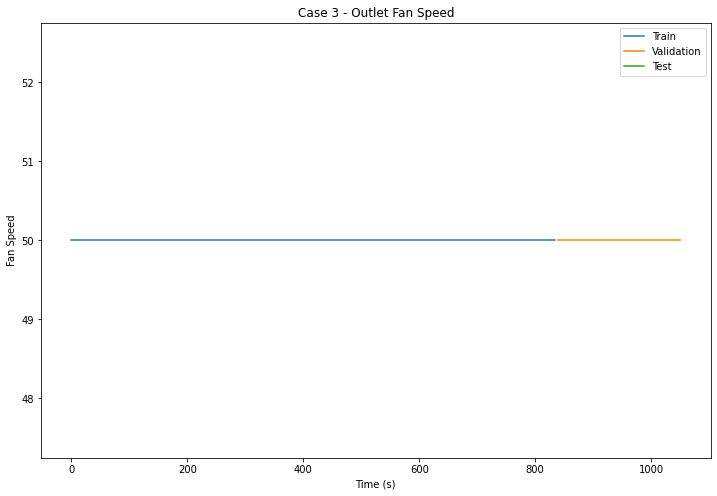

In [62]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["outlet_fan_speed"].plot(label="Train")
val_c3["outlet_fan_speed"].plot(label="Validation")
test_c3["outlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

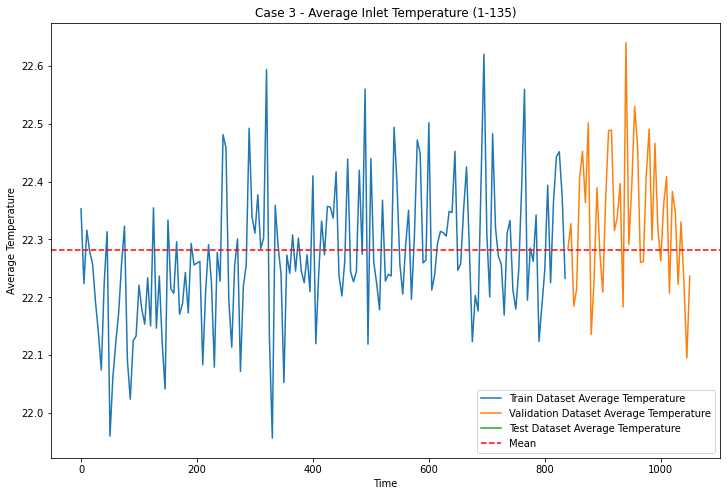

In [63]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[inlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c3[inlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c3[inlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 3 - Average Inlet Temperature (1-135)")
plt.ylabel("Average Temperature (C°)")
plt.xlabel("Time (s)")

mean = case_3[inlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

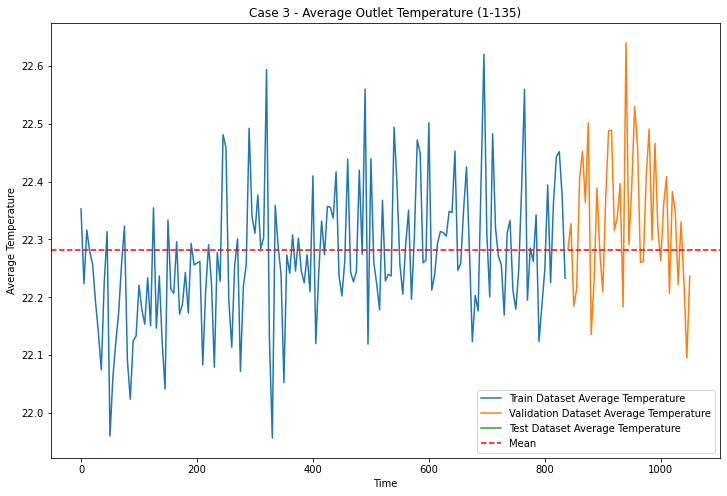

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[outlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c3[outlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c3[outlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 3 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_3[outlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_temp.jpg", dpi=300)

## Case 4

In [65]:
train_c4, test_c4, val_c4 = train_test_val_split(case_4, test_size=0)

### Inlet Fan Speed

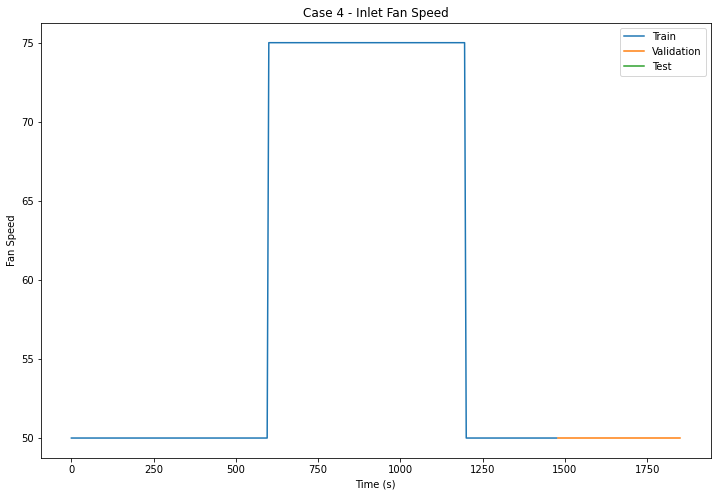

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["inlet_fan_speed"].plot(label="Train")
val_c4["inlet_fan_speed"].plot(label="Validation")
test_c4["inlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

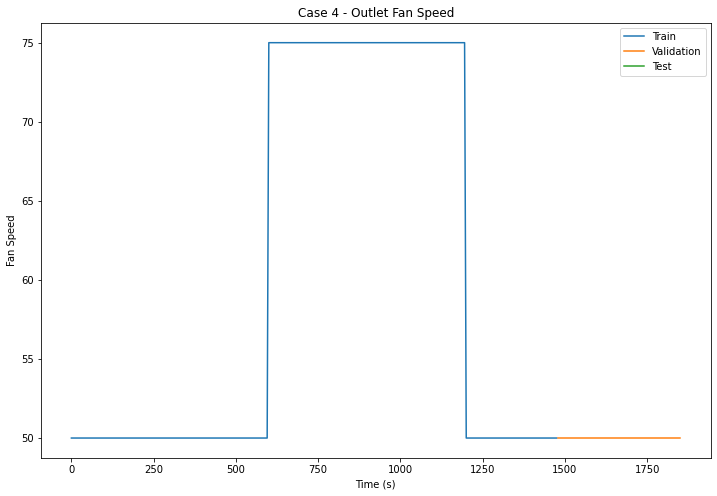

In [67]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["outlet_fan_speed"].plot(label="Train")
val_c4["outlet_fan_speed"].plot(label="Validation")
test_c4["outlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

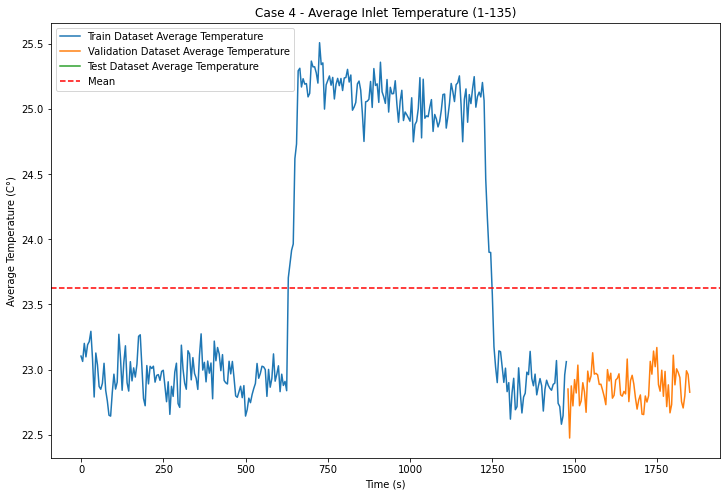

In [68]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[inlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c4[inlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c4[inlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 4 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[inlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

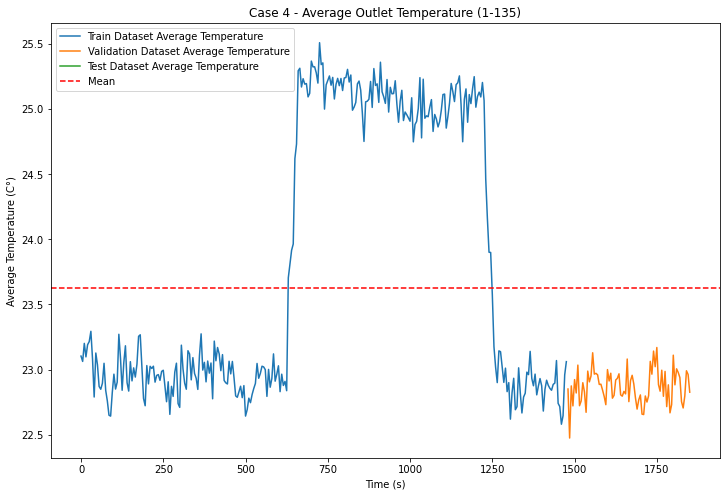

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[outlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c4[outlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c4[outlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 4 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[outlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_temp.jpg", dpi=300)

## Case 5

In [72]:
train_c5, test_c5, val_c5 = train_test_val_split(case_5, test_size=0)

### Inlet Fan Speed

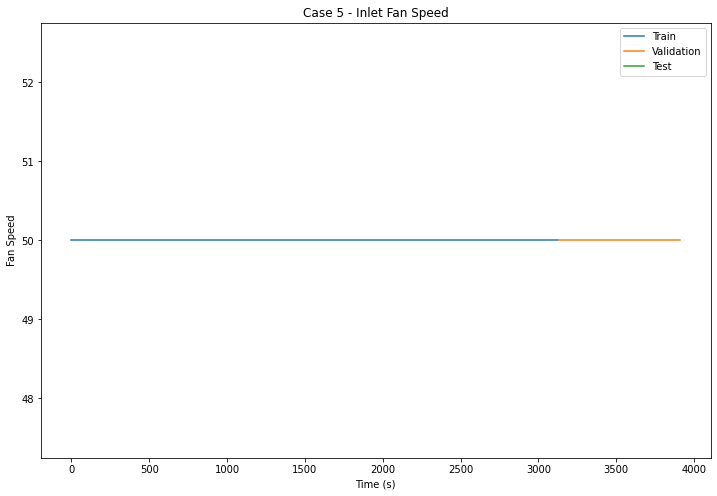

In [73]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["inlet_fan_speed"].plot(label="Train")
val_c5["inlet_fan_speed"].plot(label="Validation")
test_c5["inlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

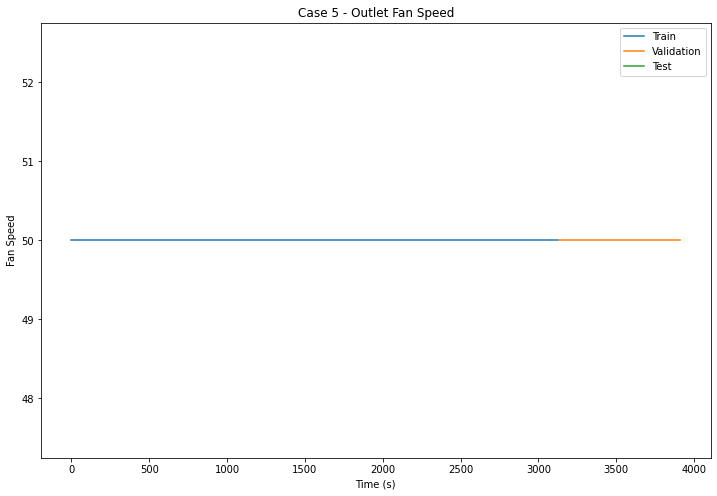

In [74]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["outlet_fan_speed"].plot(label="Train")
val_c5["outlet_fan_speed"].plot(label="Validation")
test_c5["outlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperature

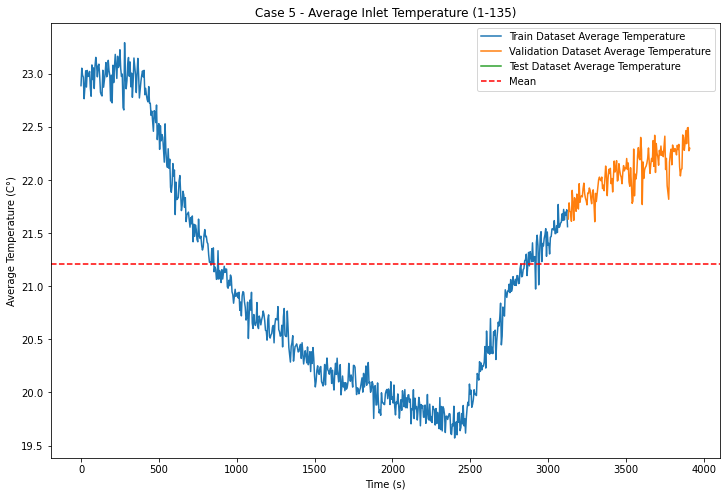

In [75]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[inlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c5[inlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c5[inlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 5 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[inlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_temperature.jpg", dpi=300)

### Outlet Temperature

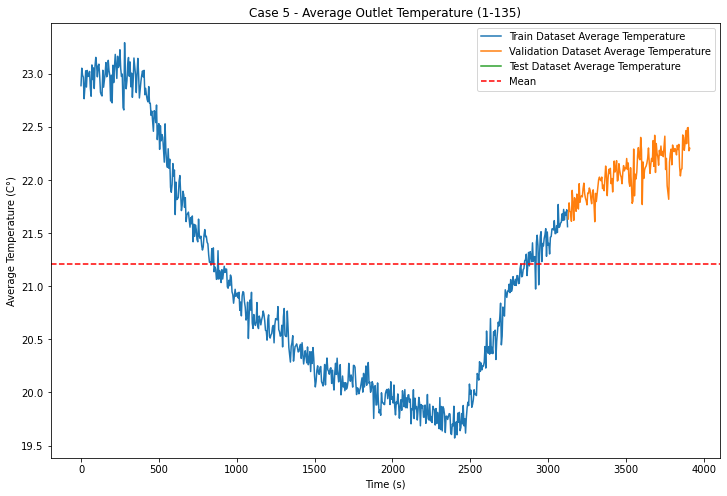

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[outlet_cols].mean(axis=1).plot(label="Train Dataset Average Temperature")
val_c5[outlet_cols].mean(axis=1).plot(label="Validation Dataset Average Temperature")
test_c5[outlet_cols].mean(axis=1).plot(label="Test Dataset Average Temperature")

plt.title("Case 5 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[outlet_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_temp.jpg", dpi=300)